<h1>Analisis de varianza par ala fabricacionde hidrogeles de PVA</h1>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats 
from statsmodels.sandbox.stats.runs import runstest_1samp 
from statsmodels.formula.api import ols 
import statsmodels.api as sm 
from tabulate import tabulate
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind 

Se definen las funciones necesarias para las pruebas

In [18]:
def test_normalitySW(data, variable): # Prueba de Normalizas Shapiro-Wilks 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """
    print(f"\nAnálisis de normalidad por Shapiro-Wilk para '{variable}'")
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Estadístico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4f}")

def t_test_one(data,mu,variable): #Prueba T para una muestra
    """
    data: arreglo de datos a comparar
    mu: media poblacional o valor de referencia 
    variable: string con el nombre de la variable que se está comparando
    """
    print(f"Prueba T para una sola muestra para {variable}")
    t_stat, p_value = stats.ttest_1samp(data, mu)
    print(f"Estadístico = {t_stat:.4f}, valor_p = {p_value:.4f}")

def random_test(residuos):
    """
    Parameters
    ----------
    residuos : Array
        DESCRIPTION: Residuos del ANOVA 
    Returns
    -------
    None.
    """
    _, p_runs = runstest_1samp(residuos, correction=True)
    print(f"Prueba de Runs: p-valor={p_runs}")

def tukey(respuesta,factor, alfa,n_factor):
    """
    Parameters
    ----------
    respuesta : Array
        DESCRIPTION. Array con los datos de la variable respuesta
    factor : Array
        DESCRIPTION.Array con los niveles del factor 
    alfa : Float
        DESCRIPTION. Valor alfa de comparación 
    n_factor : String
        DESCRIPTION. Nombre del factor

    Returns
    -------
    None.
    """    
    tukey = pairwise_tukeyhsd(respuesta, factor, alpha=alfa)
    print(f"Prueba Tukey para el factor {n_factor}")
    print(tukey)
    

<h3>Punto 1</h3>

Lectura del documento de excel usando pandas para convertirlo en un dataframe mas sencillo de manejar, no requiere rellenar ni trabajar con datos tipo NAN

In [19]:
df = pd.read_excel('res max.xlsx')

<h3>Punto 2</h3>
<h3>Normalidad</h3>

In [20]:
test_normalitySW(df['Resistencia'], 'Resistencia')


Análisis de normalidad por Shapiro-Wilk para 'Resistencia'
Estadístico = 0.9595, p-valor = 0.1165


H0: Los datos provienen de una distribucion normal <br>
H1: Los datos no provienen de una distribucion normal

Se realiza la prueba de normalidad Shapiro-Wilks, en donde el valor p obtenido es mayor al valor alfa (0.05), de esta forma se acepta H0 que indica que los valores de resistencia (variable de respuesta) son normales.

<h3>Homocedasticidad</h3>

In [21]:
nivel1=df[df['PVA']==10]['Resistencia']
nivel2=df[df['PVA']==12.50]['Resistencia']
nivel3=df[df['PVA']==15]['Resistencia']
_, levene_p = stats.levene(nivel1,nivel2,nivel3)

print(f"Levene test: p-valor = {levene_p:.4f}")

Levene test: p-valor = 0.7435


H0: Existe igualdad entre las varianzas de los datos (Homocesdasticidad)<br>
H1: Existen diferencias entre las varianzas de los datos (Heterocedasticidad)

Se realiza prueba levene en los niveles de concentracion de PVA, en donde se selecciona los niveles previamente indicados en el experimento (10%,12.5%,15%); los resultados de valor p (0.7435) mayor a alfa (0.05) indican que las varianzas entre valores son iguales por ende hay homocedasticidad entre los niveles para la concentracion de PVA

In [22]:
nivel4=df[df['CICLOS']==7]['Resistencia']
nivel5=df[df['CICLOS']==11]['Resistencia']
nivel6=df[df['CICLOS']==15]['Resistencia']
_, levene_p = stats.levene(nivel4,nivel5,nivel6)

print(f"Levene test: p-valor = {levene_p:.4f}")

Levene test: p-valor = 0.0607


Se realiza prueba levene en los niveles de concentracion de PVA, en donde se selecciona los niveles previamente indicados en el experimento (7, 11, 15); los resultados de valor p (0.0607) mayor a alfa (0.05) indican que las varianzas entre valores son iguales por ende hay homocedasticidad entre los niveles para los ciclos de congelamiento

<h3>Independencia</h3>
Los datos experimentales son independientes por la forma en la que se realiza el experimento donde la concetracion de PVA no condiciona a los ciclos de congelamiento ni viceversa, por lo tanto, no se requiere una prueba de independencia. Esta misma se estable en la forma de llevar a cabo el experimento.

<h3>Transformaciones</h3>
No se realizan transformacions debido a la normalidad verificada previamente de los datos para la concentracion de PVA y los ciclos de congelamiento

<h3>Conclusion</h3>
Las pruebas realizadas permiten verificar los siguientes supuestos: <br>
- Los datos de la variable de respuesta (Resistencia) siguen una distribución normal. <br>
- Existe homocedasticidad entre los datos de los factores. <br>
- Los puntos experimentales son independientes entre sí. <br>
De esta forma es viable realizar una prueba ANOVA 



<h3>Punto 3</h3>
<h3>Modelo ANOVA</h3>
Se usa la llave 'Resistencia ~ C(PVA)*C(CICLOS)'  para la creación del modelo, donde se consideran como factores la concentración de PVA y los ciclos de congelamiento. Esta fórmula permite incluir tanto los efectos principales como la interacción entre ambos factores, lo que da lugar a un modelo adecuado para el análisis ANOVA.

In [27]:
modelo = ols('Resistencia ~ C(PVA)*C(CICLOS)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=3)
print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃                  ┃   sum_sq ┃   df ┃         F ┃        PR(>F) ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Intercept        ┃ 146604   ┃    1 ┃  51.185   ┃   2.06158e-08 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(PVA)           ┃  57215.5 ┃    2 ┃   9.98802 ┃   0.000354328 ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(CICLOS)        ┃  14635.8 ┃    2 ┃   2.55495 ┃   0.0917087   ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ C(PVA):C(CICLOS) ┃  40009.1 ┃    4 ┃   3.49216 ┃   0.0164945   ┃
┣━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━╋━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃ Residual         ┃ 103111   ┃   36 ┃ nan       ┃ nan           ┃
┗━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━┻━━━━━━┻━━━━━━━━━━━┻━━━━━━━━━━━━━━━┛


H0: El efecto es igual a cero, es decir no es significativo<br>
H1: El efecto es diferente de cero, es decir es significativo

La variable 'ciclos' no presenta un efecto significativo según el valor p obtenido en la tabla ANOVA (0.091), el cual es mayor al nivel de significancia α = 0.05. En cambio, tanto la concentración de PVA como la interacción entre concentración de PVA y ciclos de congelamiento muestran valores p menores a α (0.0003.. y 0.016.., respectivamente), indicando un efecto significativo. No obstante, no es apropiado eliminar la variable 'ciclos', ya que su interacción con la concentración de PVA sí influye significativamente en la resistencia. Esto sugiere que la resistencia del material se ve afectada por la concentración de PVA en función de los ciclos de congelamiento aplicados en cada nivel de concentracion de PVA. 

<h3>Punto 4</h3>
<h3>Residuos del modelo</h3>

In [28]:
df['Residuos']=modelo.resid

Se crea la columna Residuos en el dataframe para su posterior analisis en el modelo del ANOVA

<h3>Normalidad</h3>

In [ ]:
test_normalitySW(df['Residuos'],'Residuos')


Análisis de normalidad por Shapiro-Wilk para 'Residuos'
Estadístico = 0.9248, p-valor = 0.0062


Con la prueba de normalidad aplicada a los residuos, se obtiene un valor p de 0.0062, el cual es menor que el nivel de significancia (α = 0.05). Por lo tanto, se rechaza la hipótesis nula y se acepta la hipótesis alternativa, concluyendo que los residuos no siguen una distribución normal. No obstante, al tratarse de un modelo con efectos fijos, se puede complementar esta verificación mediante inspección gráfica de los residuos.

<h3>Media 0</h3>

In [30]:
t_test_one(df['Residuos'],0,"Residuos")

Prueba T para una sola muestra para Residuos
Estadístico = -0.0000, valor_p = 1.0000


H0: La media de los residuos es igual a 0<br> 
H1: La media de los residuos es diferente a 0

Al realizar la prueba t para los residuos, se obtuvo un valor p de 1, el cual es mayor que el nivel de significancia (α = 0.005). Esto permite no rechazar la hipótesis nula (H0), lo que indica que los datos no presentan una media significativamente diferente de 0

<h3>Alatoriedad</h3>

In [31]:
random_test(df['Residuos'])

Prueba de Runs: p-valor=0.777165884119708


H0: La secuencia es aleatoria<br>
H1: La secuencia no es aleatoria

El valor p de 0.7771.. obtenido en la prueba de Runs es superior al nivel de significancia (α = 0.005), lo que nos lleva a no rechazar la hipótesis nula (H0). Esto sugiere que los residuos siguen un patrón aleatorio.

<h3>Grafica</h3>

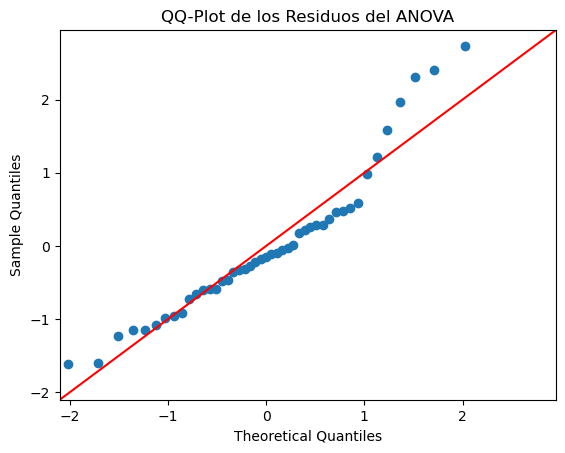

In [ ]:
sm.qqplot(df['Residuos'], line='45', fit=True)
plt.title("QQ-Plot de los Residuos del ANOVA")
plt.show()

En la prueba de normalidad, se encontró que los residuos no siguen una distribución normal. Sin embargo, al analizar la gráfica correspondiente, se observa que, para un modelo de efecto fijo, los datos parecen ajustarse razonablemente a una distribución normal. Esto se puede evidenciar por la proximidad de los puntos a la línea de referencia (línea roja), lo que sugiere que los datos siguen una distribución aproximadamente normal.

<h3>Conclusion</h3>
Las pruebas realizadas permiten validar los supuestos necesarios para la aplicación de la prueba ANOVA, a partir del análisis de los residuos: <br>
- Los residuos presentan una distribución aproximadamente normal. <br>
- La media de los residuos es igual a 0. <br>
- Los residuos se distribuyen de forma aleatoria. <br>
Por lo tanto, se confirma la validez de la prueba ANOVA aplicada.

<h3>Punto 5</h3>

<h3>Analisis de comparaciones multiples</h3>

In [ ]:
tukey(df["Resistencia"], df["PVA"],0.05,"PVA")

Prueba Tukey para el factor PVA
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  10.0   12.5 -38.6459 0.1891 -91.4305  14.1387  False
  10.0   15.0  60.7404 0.0208   7.9559  113.525   True
  12.5   15.0  99.3863 0.0001  46.6017 152.1709   True
------------------------------------------------------


Se realizó la prueba de comparaciones múltiples únicamente para la concentración de PVA, ya que este factor mostró un efecto significativo según la prueba ANOVA. No se aplicó la prueba para la interacción PVA-CICLOS, dado que las comparaciones múltiples se realizan entre niveles de un mismo factor. Asimismo, no se efectuó la prueba para los ciclos de congelamiento, ya que no presentaron un efecto significativo en el análisis ANOVA.

H0: μi = μj<br>
H1: μi != μj

-Entre 10% y 12.5% de PVA: No hay diferencia significativa en la resistencia (p = 0.1891 > 0.05). <br>
-Entre 10% y 15% de PVA: Sí hay una diferencia significativa en la resistencia (p = 0.0208 < 0.05).<br>
-Entre 12.5% y 15% de PVA: También se encuentra una diferencia significativa (p = 0.0001 < 0.05).<br>

La prueba de comparaciones múltiples de Tukey aplicada al factor concentración de PVA revela diferencias significativas en la resistencia entre los niveles 10%-15% y 12.5%-15%. No se observa diferencia significativa entre los niveles 10% y 12.5%. Esto indica que aumentar la concentración de PVA a 15% tiene un efecto significativo en el incremento de la resistencia del material

<h3>Punto 6</h3>
<h3>Conclusion</h3>

El análisis de varianza (ANOVA) permitió evaluar el efecto del porcentaje de PVA y el número de ciclos de congelamiento sobre la resistencia máxima de hidrogeles al 100% de elongación. Tras verificar los supuestos del modelo (normalidad, homocedasticidad e independencia de los residuos), se ajustó un modelo con interacción entre los factores. El análisis reveló que: <br><br>
-El porcentaje de PVA tiene un efecto significativo sobre la resistencia máxima.<br>
-En particular, concentraciones más altas de PVA (15%) incrementan significativamente la resistencia en comparación con niveles más bajos (10% y 12.5%).<br>
-El número de ciclos de congelamiento, por sí solo, no mostró un efecto significativo de forma individual (p = 0.091).<br>
-Sin embargo, la interacción entre la concentración de PVA y los ciclos de congelamiento sí es significativa, lo cual indica que el efecto de un factor depende del nivel del otro.<br><br>
Esto sugiere que no se puede optimizar la resistencia del hidrogel considerando cada factor por separado: la combinación específica de concentración y número de ciclos es clave para obtener mejores propiedades mecánicas.<br><br>
Esto implica que el diseño de hidrogeles con alta resistencia mecánica debe considerar no solo el aumento en la concentración de PVA, sino también la cantidad de ciclos de congelamiento, ya que su efecto combinado puede optimizar las propiedades mecánicas del material<br><br>
En conclusión, la concentración de PVA es determinante para la resistencia del hidrogel, y su efecto se ve modificado por el número de ciclos de congelamiento. Esta interacción debe considerarse cuidadosamente en el diseño y fabricación de hidrogeles para aplicaciones en bioingenieria. 